**Group: Jan Willruth, Lennart Clasmeier, Tristan von Busch**

## Data

For this exercise we simulate Single Cell RNA sequence data using [Splatter package in R](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1305-0) which is publically available. 

First, one need to start `rmagic` by executing this in a cell:

%load_ext rpy2.ipython

Then, use `%%R` to execute cell magic. Use this if you want all syntax in a cell to be executed in R. Note that this must be placed at the beginning of the cell.

In [1]:
%load_ext rpy2.ipython

install bioconductor.
This may take some time!

In [ ]:
%%R
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.16")

install splatter

In [ ]:
%%R
BiocManager::install("splatter", verbose=FALSE)

## 1) Simulate 5000 samples with 2000 genes with following parameters
### 1.1) Simulate samples from two different groups (cell types) with mean of 0.6 and drop out probability of 0.3 and 0.6

In [4]:
%%R
suppressPackageStartupMessages({
  library(splatter)
  library(scater)
})

In [5]:
%%R
params <- newSplatParams()
params <- setParam(params, "nGenes", 2000)
params <- setParam(params, "mean.rate", 0.6)
params <- setParam(params, "dropout.type", "experiment")
params <- setParam(params, "dropout.mid", 0.3)

sim <- splatSimulate(params, verbose = FALSE)

In [6]:
%%R
params <- newSplatParams()
params <- setParam(params, "nGenes", 2000)
params <- setParam(params, "mean.rate", 0.6)
params <- setParam(params, "dropout.type", "experiment")
params <- setParam(params, "dropout.mid", 0.6)

sim2 <- splatSimulate(params, verbose = FALSE)

In [7]:
%%R
write.table(counts(sim), "sim.txt")
write.table(counts(sim2), "sim2.txt")

### 1.2) Plot heatmap of the normalized samples with different dropout rates to depict the dropout effect.

In [8]:
import pandas as pd

sim = pd.read_table("sim.txt", sep=" ")
sim2 = pd.read_table("sim2.txt", sep=" ")

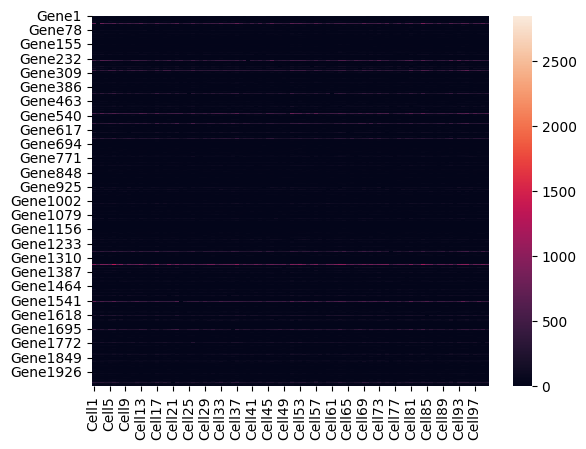

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(sim)
plt.show()

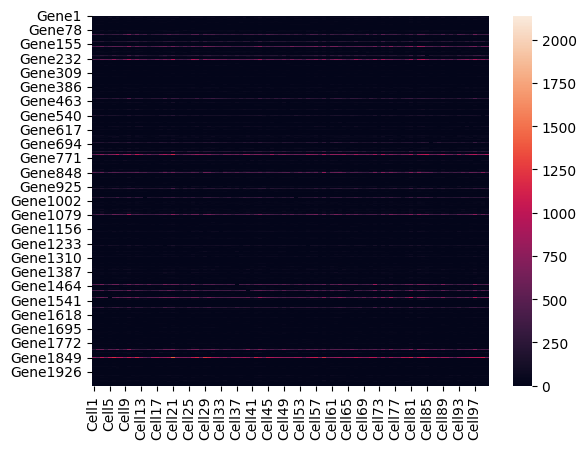

In [10]:
sns.heatmap(sim2)
plt.show()

### 1.3) Simulate and illustrates tSNE visualization of simulated scRNA-seq data with six cell types with the same mean and dropout rates as before.

In [11]:
%%R
params <- newSplatParams()
params <- setParam(params, "mean.rate", 0.6)
params <- setParam(params, "dropout.type", "experiment")
params <- setParam(params, "dropout.mid", 0.3)

sim.groups <- splatSimulate(params, group.prob = c(1/6,1/6,1/6,1/6,1/6,1/6), method = "groups", verbose = FALSE)
write.table(counts(sim.groups), "sim_tsne.txt")

In [12]:
import numpy as np
from sklearn.manifold import TSNE

sim_tsne = pd.read_table("sim_tsne.txt", sep=" ")
sim_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(sim_tsne)

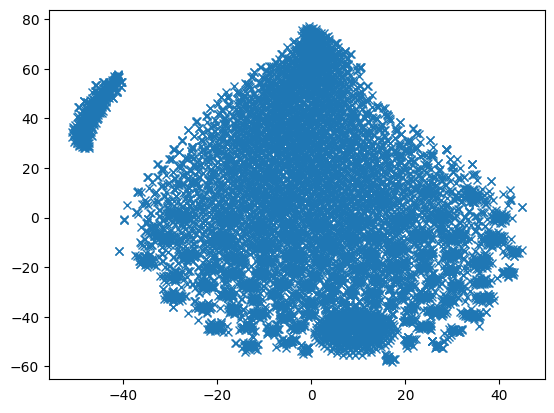

In [13]:
plt.plot(sim_tsne.T[0],sim_tsne.T[1], "x")
plt.show()

## 2) Normalization

### 2.1) Apply log transform on the simulated data and plot the heatmap

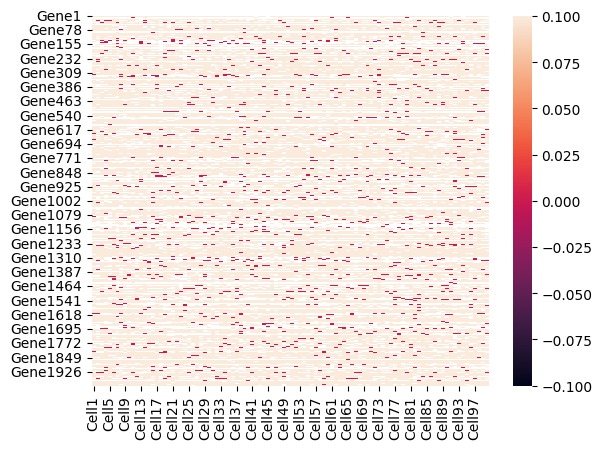

In [19]:
import numpy as np
log_sim = sim.transform(lambda x: np.log2(x))
sns.heatmap(log_sim)
plt.show()

### 2.2) Normalize the simulated data using z-score and plot the heatmap

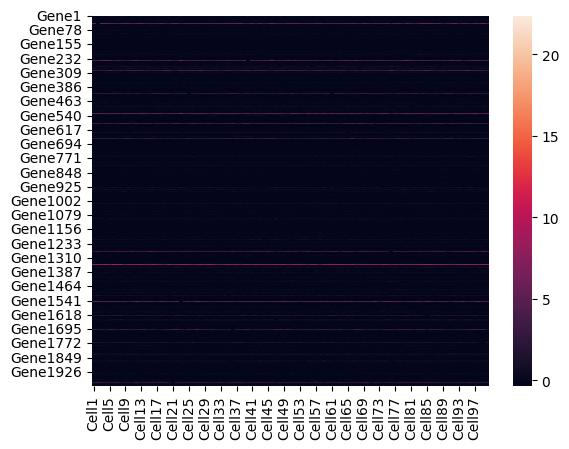

In [15]:
from scipy.stats import zscore
zscore_sim = zscore(sim)
sns.heatmap(zscore_sim)
plt.show()

## 3) Dimension reduction
### 3.1) Use PCA to reduce two groups of cells with mean 0.1 and 0.05 into two dimensions.

In [ ]:
%%R
sim.groups <- splatSimulate(group.prob = c(0.1, 0.05), method = "groups", verbose = FALSE)
sim.groups <- logNormCounts(sim.groups)
sim.groups <- runPCA(sim.groups)

### 3.2) Plot the data in two dimensions with different colors for dataset a and b.

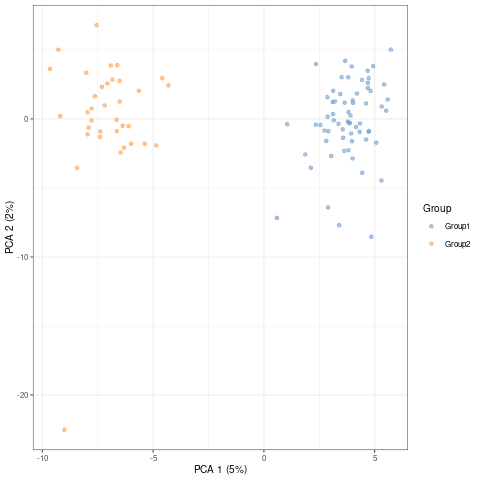

In [23]:
%%R
plotPCA(sim.groups, colour_by = "Group")

## 4) Batch effect
### 4.1) Simulate data with batch effect and plot the PCA dimensionality reduction (in two dimensions). Use following parameters:
1. three groups with 1000,1500, 2500 samples
2. from two cell type with frequency of 60% and 40%. 

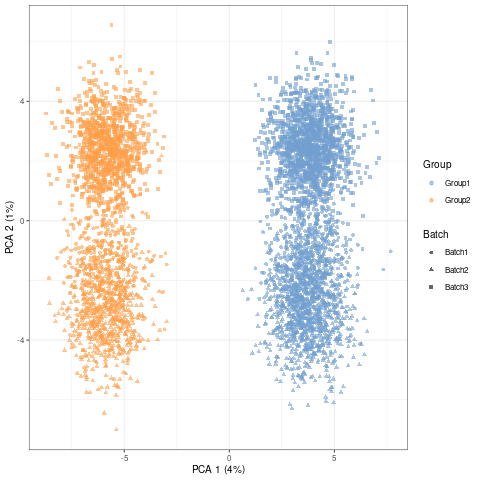

In [18]:
%%R
sim.groups <- splatSimulate(batchCells = c(1000, 1500, 2500), group.prob = c(0.6, 0.4), method = "groups", verbose = FALSE)
sim.groups <- logNormCounts(sim.groups)
sim.groups <- runPCA(sim.groups)
plotPCA(sim.groups, shape_by = "Batch", colour_by = "Group")

#### References:
* https://bioconductor.org/packages/release/bioc/vignettes/splatter/inst/doc/splatter.html